In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('pivothours.csv')

In [9]:
# i only pivoted the hours from 6 am to 9 pm cuz no high demand of 
# rebalancing between 9 pm to 6 am but i might be wrong... oh well we'll see
df

,dock_id,dock_name,tot_docks,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
0,72,W 52 St & 11 Ave,55,0.315648,0.326555,0.270828,0.214601,0.210432,0.229639,0.208081,0.216462,0.218717,0.204416,0.242766,0.219462,0.214205,0.210101,0.230221,0.241791
1,79,Franklin St & W Broadway,35,0.228571,0.285714,0.400000,0.485714,0.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,St James Pl & Pearl St,28,0.442857,0.456349,0.415966,0.315789,0.303571,0.383929,0.372024,0.315476,0.467532,0.406593,0.404762,0.413690,0.357143,0.342262,0.389610,0.395833
3,83,Atlantic Ave & Fort Greene Pl,62,0.373875,0.388223,0.400696,0.414055,0.423419,0.423072,0.426279,0.430698,0.429204,0.435559,0.431943,0.436743,0.436285,0.440306,0.448174,0.442505
4,116,W 17 St & 8 Ave,39,0.307329,0.309764,0.317484,0.366218,0.410937,0.425752,0.439459,0.436645,0.421524,0.381308,0.346123,0.283489,0.240743,0.256787,0.269961,0.301244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,3536,W 116 St & Broadway,43,0.035659,0.064599,0.080399,0.109738,0.098661,0.100129,0.089252,0.081395,0.081395,0.067031,0.064834,0.056772,0.046512,0.043854,0.046512,0.026676
799,3537,Carlton Ave & Dean St,29,0.586207,0.534483,0.525862,0.448276,0.517241,0.440613,0.487069,0.498433,0.512931,0.407524,0.459770,0.458621,0.538793,0.508621,0.616858,0.508621
800,3538,W 110 St & Amsterdam Ave,45,NaN,NaN,NaN,NaN,NaN,0.266667,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,3629,Adam Clayton Powell Blvd & W 126 St,33,NaN,NaN,NaN,NaN,NaN,0.515152,0.560606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# rename the columns to get rid of the underscores in front of the numbers
old = df.columns.tolist()[3:]
new = list(range(6, 22))
df = df.rename(columns = dict(zip(old, new)))
df

,dock_id,dock_name,tot_docks,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,72,W 52 St & 11 Ave,55,0.315648,0.326555,0.270828,0.214601,0.210432,0.229639,0.208081,0.216462,0.218717,0.204416,0.242766,0.219462,0.214205,0.210101,0.230221,0.241791
1,79,Franklin St & W Broadway,35,0.228571,0.285714,0.400000,0.485714,0.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,St James Pl & Pearl St,28,0.442857,0.456349,0.415966,0.315789,0.303571,0.383929,0.372024,0.315476,0.467532,0.406593,0.404762,0.413690,0.357143,0.342262,0.389610,0.395833
3,83,Atlantic Ave & Fort Greene Pl,62,0.373875,0.388223,0.400696,0.414055,0.423419,0.423072,0.426279,0.430698,0.429204,0.435559,0.431943,0.436743,0.436285,0.440306,0.448174,0.442505
4,116,W 17 St & 8 Ave,39,0.307329,0.309764,0.317484,0.366218,0.410937,0.425752,0.439459,0.436645,0.421524,0.381308,0.346123,0.283489,0.240743,0.256787,0.269961,0.301244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,3536,W 116 St & Broadway,43,0.035659,0.064599,0.080399,0.109738,0.098661,0.100129,0.089252,0.081395,0.081395,0.067031,0.064834,0.056772,0.046512,0.043854,0.046512,0.026676
799,3537,Carlton Ave & Dean St,29,0.586207,0.534483,0.525862,0.448276,0.517241,0.440613,0.487069,0.498433,0.512931,0.407524,0.459770,0.458621,0.538793,0.508621,0.616858,0.508621
800,3538,W 110 St & Amsterdam Ave,45,NaN,NaN,NaN,NaN,NaN,0.266667,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,3629,Adam Clayton Powell Blvd & W 126 St,33,NaN,NaN,NaN,NaN,NaN,0.515152,0.560606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sub = df[~df.isna().any(axis = 1)]

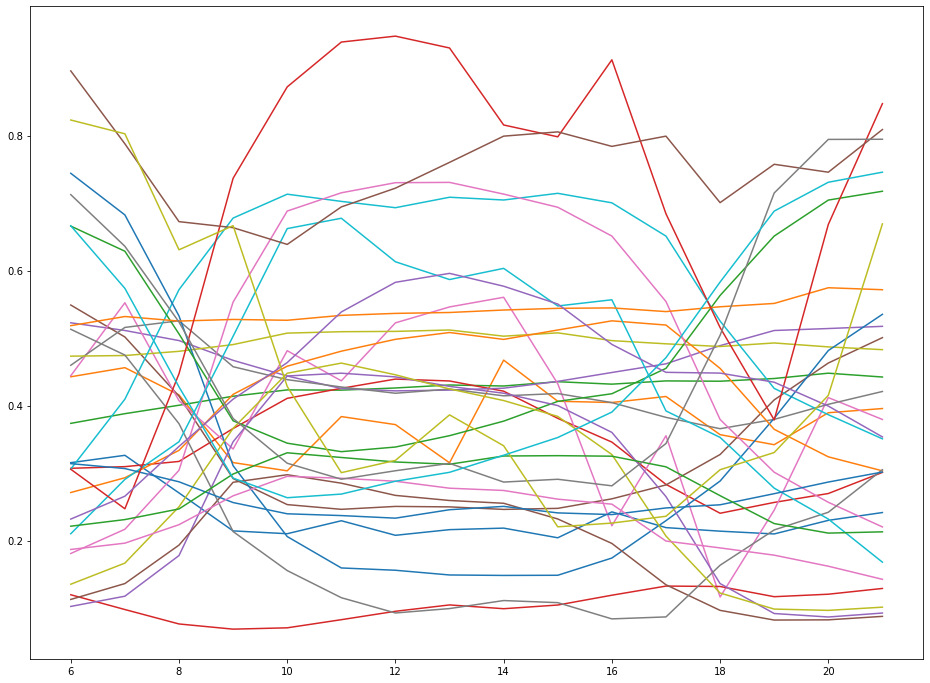

In [25]:
for _ in range(30):   
    row = sub.iloc[_][3:]
    row.plot(figsize = (16, 12))

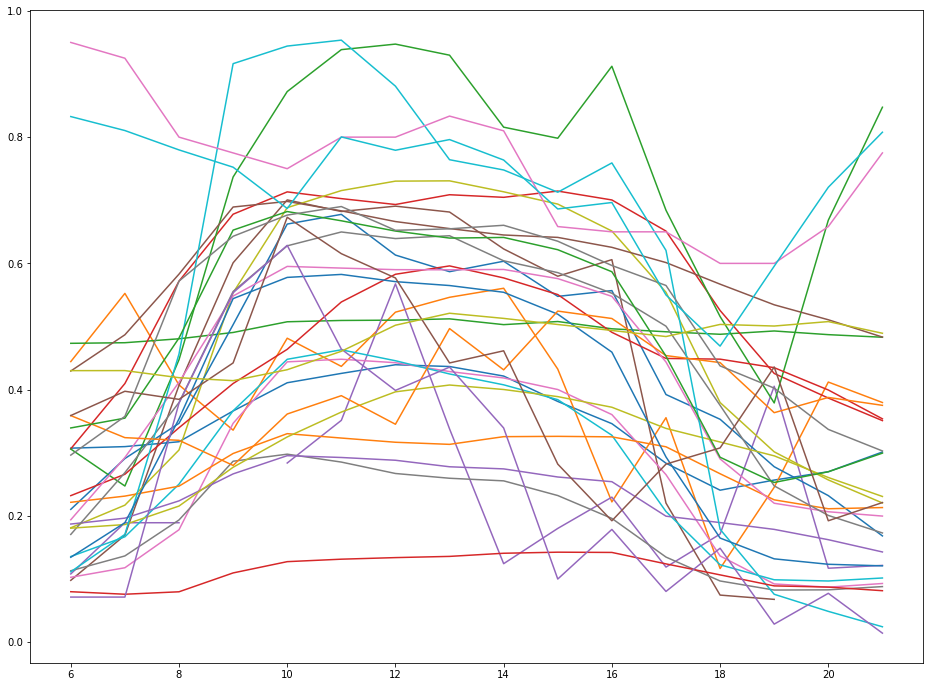

In [39]:
# clustering where the bike availability is the highest in the afternoon
# aka commercial areas like FIDI & central midtown

cluster1 = df[(df[8] < df[13]) & (df[13] > df[17])]
for _ in range(30):   
    row = cluster1.iloc[_][3:]
    row.plot(figsize = (16, 12))

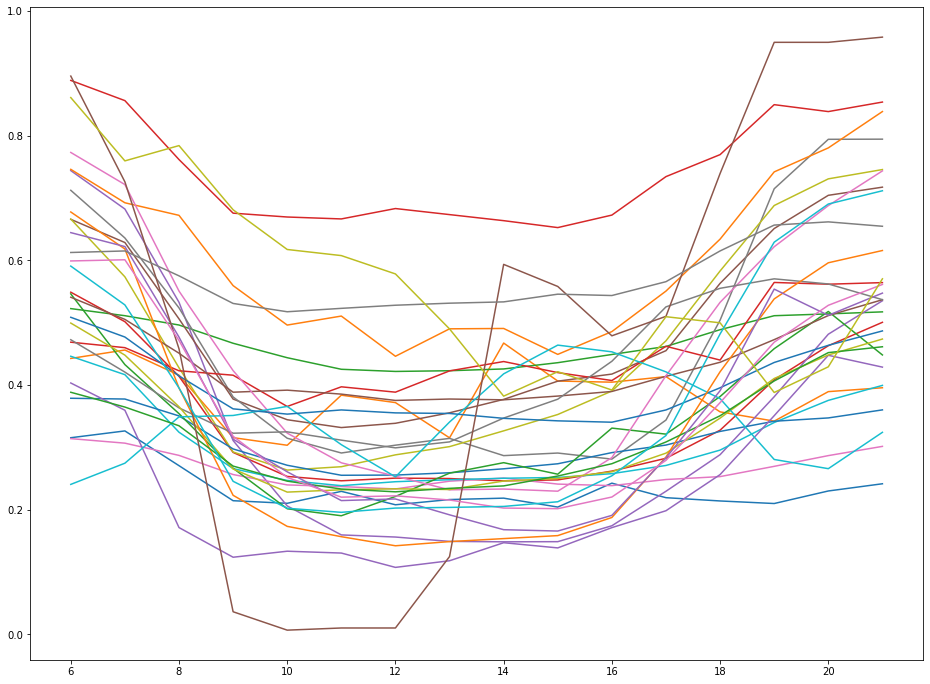

In [40]:
# clustering where the bike availability is the lowest in the afternoon
# aka residiential areas like LES & UWS

cluster2 = df[(df[8] > df[13]) & (df[13] < df[17])]
for _ in range(30):   
    row = cluster2.iloc[_][3:]
    row.plot(figsize = (16, 12))

In [42]:
# let's bring in the data with every 15 minutes
qh = pd.read_csv('quarterhourly.csv')
qh

,dock_id,dock_name,time,avail_bikes,avail_docks,tot_docks,avail_bikes_proportion,avail_docks_proportion
0,72,W 52 St & 11 Ave,0,17.588235,37.411765,55,0.319786,0.680214
1,72,W 52 St & 11 Ave,15,17.071429,37.928571,55,0.310390,0.689610
2,72,W 52 St & 11 Ave,30,13.733333,41.266667,55,0.249697,0.750303
3,72,W 52 St & 11 Ave,45,17.650000,37.350000,55,0.320909,0.679091
4,72,W 52 St & 11 Ave,100,16.619048,38.380952,55,0.302165,0.697835
...,...,...,...,...,...,...,...,...
63161,3538,W 110 St & Amsterdam Ave,1230,12.000000,33.000000,45,0.266667,0.733333
63162,3629,Adam Clayton Powell Blvd & W 126 St,1115,17.000000,16.000000,33,0.515152,0.484848
63163,3629,Adam Clayton Powell Blvd & W 126 St,1200,17.000000,16.000000,33,0.515152,0.484848
63164,3629,Adam Clayton Powell Blvd & W 126 St,1230,20.000000,13.000000,33,0.606061,0.393939


In [53]:
# pivot the table
pivot = pd.pivot_table(qh, values = 'avail_bikes_proportion', index=['dock_id', 'tot_docks'], columns = 'time').reset_index()

In [54]:
pd.set_option('display.max_columns', 500)
pivot

time,dock_id,tot_docks,0,15,30,45,100,115,130,145,200,215,230,245,300,315,330,345,400,415,430,445,500,515,530,545,600,615,630,645,700,715,730,745,800,815,830,845,900,915,930,945,1000,1015,1030,1045,1100,1115,1130,1145,1200,1215,1230,1245,1300,1315,1330,1345,1400,1415,1430,1445,1500,1515,1530,1545,1600,1615,1630,1645,1700,1715,1730,1745,1800,1815,1830,1845,1900,1915,1930,1945,2000,2015,2030,2045,2100,2115,2130,2145,2200,2215,2230,2245,2300,2315,2330,2345
0,72,55,0.319786,0.310390,0.249697,0.320909,0.302165,0.306061,0.322078,0.291919,0.319697,0.309091,0.277686,0.296970,0.318577,0.277922,0.281818,0.312299,0.296651,0.275455,0.344156,0.287446,0.277273,0.276136,0.333971,0.255682,0.292424,0.334007,0.307438,0.304132,0.329870,0.378788,0.261039,0.335537,0.387879,0.166434,0.237945,0.293182,0.230769,0.223377,0.184190,0.237500,0.176860,0.233766,0.211111,0.198347,0.245059,0.190909,0.268531,0.221053,0.202871,0.210227,0.241414,0.179904,0.227273,0.227879,0.168831,0.227636,0.218182,0.216883,0.234091,0.196364,0.139037,0.308182,0.219481,0.142584,0.255455,0.232536,0.172727,0.271901,0.211111,0.212987,0.227751,0.223636,0.178182,0.201653,0.221053,0.253147,0.206061,0.206699,0.166434,0.247847,0.213636,0.198864,0.276680,0.214354,0.184848,0.267769,0.199043,0.307792,0.293388,0.249761,0.270813,0.309091,0.311005,0.340909,0.254545,0.286364
1,79,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257143,NaN,0.257143,NaN,NaN,0.257143,NaN,NaN,0.257143,NaN,NaN,0.257143,NaN,NaN,0.228571,NaN,NaN,0.285714,NaN,NaN,0.342857,NaN,0.457143,NaN,NaN,0.485714,NaN,NaN,0.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,28,0.375000,0.071429,0.375000,0.476190,0.273810,0.375000,0.476190,0.273810,0.375000,0.375000,0.476190,0.273810,0.375000,0.375000,0.375000,0.375000,0.476190,0.375000,0.297619,0.511905,0.414286,0.357143,0.491071,0.371429,0.452381,0.440476,0.452381,0.421429,0.464286,0.464286,0.375000,0.507143,0.392857,0.464286,0.407143,0.401786,0.321429,0.328571,0.328571,0.276786,0.267857,0.285714,0.328571,0.333333,0.357143,0.375000,0.410714,0.392857,0.392857,0.392857,0.366071,0.321429,0.285714,0.285714,0.276786,0.482143,0.488095,0.452381,0.476190,0.446429,0.428571,0.375000,0.383929,0.428571,0.285714,0.500000,0.333333,0.500000,0.464286,0.428571,0.410714,0.375000,0.375000,0.366071,0.357143,0.339286,0.357143,0.339286,0.339286,0.339286,0.339286,0.357143,0.464286,0.392857,0.392857,0.410714,0.401786,0.375000,0.476190,0.297619,0.383929,0.375000,0.273810,0.375000,0.375000,0.476190
3,83,62,0.395884,0.389752,0.384765,0.377085,0.381990,0.369953,0.376238,0.363448,0.374396,0.376951,0.373380,0.372027,0.371880,0.369621,0.375101,0.376291,0.372038,0.372058,0.372055,0.377614,0.359366,0.366062,0.372825,0.370403,0.368817,0.372206,0.377016,0.377336,0.388934,0.383600,0.384404,0.395728,0.392859,0.395086,0.407874,0.406959,0.403763,0.413568,0.416634,0.421870,0.420414,0.427382,0.426526,0.419205,0.416449,0.432050,0.416877,0.426422,0.430100,0.421612,0.425499,0.427698,0.436217,0.415260,0.435785,0.435385,0.416748,0.435266,0.426589,0.437781,0.439395,0.432524,0.430039,0.440231,0.424657,0.444110,0.421944,0.436908,0.437378,0.434657,0.440554,0.434512,0.439325,0.437370,0.433332,0.435169,0.431274,0.442813,0.438075,0.449281,0.445776,0.442172,0.458146,0.446509,0.439768,0.445607,0.445193,0.439338,0.423986,0.431222,0.419862,0.422896,0.421756,0.412683,0.400080,0.406252
4,116,39,0.327026,0.328529,0.306364,0.331286,0.324836,0.315053,0.303216,0.323712,0.320104,0.313491,0.308031,0.311685,0.311355,0.305381,0.314995,0.311801,0.311043,0.303541,0.316288,0.289444,0.295343,0.307743,0.304109,0.304414,0.305619,0.300062,0.314459,0.308906,0.310144,0.320642,0.310805,0.297941,0.293069,0.312952,0.328976,0.334512,0.336070,0.340145,0.388103,0.399865,0.399430,0.419130,0.406752,0.418408,0.434310,0.415778,0.433869,0.419765,0.433850,0.447213,0.438339,0.438736,0.

In [55]:
qsub = pivot[~pivot.isna().any(axis = 1)]
qsub

time,dock_id,tot_docks,0,15,30,45,100,115,130,145,200,215,230,245,300,315,330,345,400,415,430,445,500,515,530,545,600,615,630,645,700,715,730,745,800,815,830,845,900,915,930,945,1000,1015,1030,1045,1100,1115,1130,1145,1200,1215,1230,1245,1300,1315,1330,1345,1400,1415,1430,1445,1500,1515,1530,1545,1600,1615,1630,1645,1700,1715,1730,1745,1800,1815,1830,1845,1900,1915,1930,1945,2000,2015,2030,2045,2100,2115,2130,2145,2200,2215,2230,2245,2300,2315,2330,2345
0,72,55,0.319786,0.310390,0.249697,0.320909,0.302165,0.306061,0.322078,0.291919,0.319697,0.309091,0.277686,0.296970,0.318577,0.277922,0.281818,0.312299,0.296651,0.275455,0.344156,0.287446,0.277273,0.276136,0.333971,0.255682,0.292424,0.334007,0.307438,0.304132,0.329870,0.378788,0.261039,0.335537,0.387879,0.166434,0.237945,0.293182,0.230769,0.223377,0.184190,0.237500,0.176860,0.233766,0.211111,0.198347,0.245059,0.190909,0.268531,0.221053,0.202871,0.210227,0.241414,0.179904,0.227273,0.227879,0.168831,0.227636,0.218182,0.216883,0.234091,0.196364,0.139037,0.308182,0.219481,0.142584,0.255455,0.232536,0.172727,0.271901,0.211111,0.212987,0.227751,0.223636,0.178182,0.201653,0.221053,0.253147,0.206061,0.206699,0.166434,0.247847,0.213636,0.198864,0.276680,0.214354,0.184848,0.267769,0.199043,0.307792,0.293388,0.249761,0.270813,0.309091,0.311005,0.340909,0.254545,0.286364
2,82,28,0.375000,0.071429,0.375000,0.476190,0.273810,0.375000,0.476190,0.273810,0.375000,0.375000,0.476190,0.273810,0.375000,0.375000,0.375000,0.375000,0.476190,0.375000,0.297619,0.511905,0.414286,0.357143,0.491071,0.371429,0.452381,0.440476,0.452381,0.421429,0.464286,0.464286,0.375000,0.507143,0.392857,0.464286,0.407143,0.401786,0.321429,0.328571,0.328571,0.276786,0.267857,0.285714,0.328571,0.333333,0.357143,0.375000,0.410714,0.392857,0.392857,0.392857,0.366071,0.321429,0.285714,0.285714,0.276786,0.482143,0.488095,0.452381,0.476190,0.446429,0.428571,0.375000,0.383929,0.428571,0.285714,0.500000,0.333333,0.500000,0.464286,0.428571,0.410714,0.375000,0.375000,0.366071,0.357143,0.339286,0.357143,0.339286,0.339286,0.339286,0.339286,0.357143,0.464286,0.392857,0.392857,0.410714,0.401786,0.375000,0.476190,0.297619,0.383929,0.375000,0.273810,0.375000,0.375000,0.476190
3,83,62,0.395884,0.389752,0.384765,0.377085,0.381990,0.369953,0.376238,0.363448,0.374396,0.376951,0.373380,0.372027,0.371880,0.369621,0.375101,0.376291,0.372038,0.372058,0.372055,0.377614,0.359366,0.366062,0.372825,0.370403,0.368817,0.372206,0.377016,0.377336,0.388934,0.383600,0.384404,0.395728,0.392859,0.395086,0.407874,0.406959,0.403763,0.413568,0.416634,0.421870,0.420414,0.427382,0.426526,0.419205,0.416449,0.432050,0.416877,0.426422,0.430100,0.421612,0.425499,0.427698,0.436217,0.415260,0.435785,0.435385,0.416748,0.435266,0.426589,0.437781,0.439395,0.432524,0.430039,0.440231,0.424657,0.444110,0.421944,0.436908,0.437378,0.434657,0.440554,0.434512,0.439325,0.437370,0.433332,0.435169,0.431274,0.442813,0.438075,0.449281,0.445776,0.442172,0.458146,0.446509,0.439768,0.445607,0.445193,0.439338,0.423986,0.431222,0.419862,0.422896,0.421756,0.412683,0.400080,0.406252
4,116,39,0.327026,0.328529,0.306364,0.331286,0.324836,0.315053,0.303216,0.323712,0.320104,0.313491,0.308031,0.311685,0.311355,0.305381,0.314995,0.311801,0.311043,0.303541,0.316288,0.289444,0.295343,0.307743,0.304109,0.304414,0.305619,0.300062,0.314459,0.308906,0.310144,0.320642,0.310805,0.297941,0.293069,0.312952,0.328976,0.334512,0.336070,0.340145,0.388103,0.399865,0.399430,0.419130,0.406752,0.418408,0.434310,0.415778,0.433869,0.419765,0.433850,0.447213,0.438339,0.438736,0.419485,0.448741,0.442046,0.436136,0.432887,0.423900,0.420149,0.409252,0.390964,0.384568,0.376280,0.373647,0.372359,0.341386,0.338491,0.332666,0.316207,0.297952,0.275703,0.245555,0.249354,0.234721,0.238328,0.240988,0.239704,0.261704,0.258788,0.267219,0.264488,0.262797,0.280304,0.272265,0.291363,0.308629,0.289647,0.317194,0.307602,0.322623,0.328205,0.320177,0.329935,0.322896,0.332441,0.327347
5,119,19,0.528681,0.526546,0.521365,0.521916,0.523621

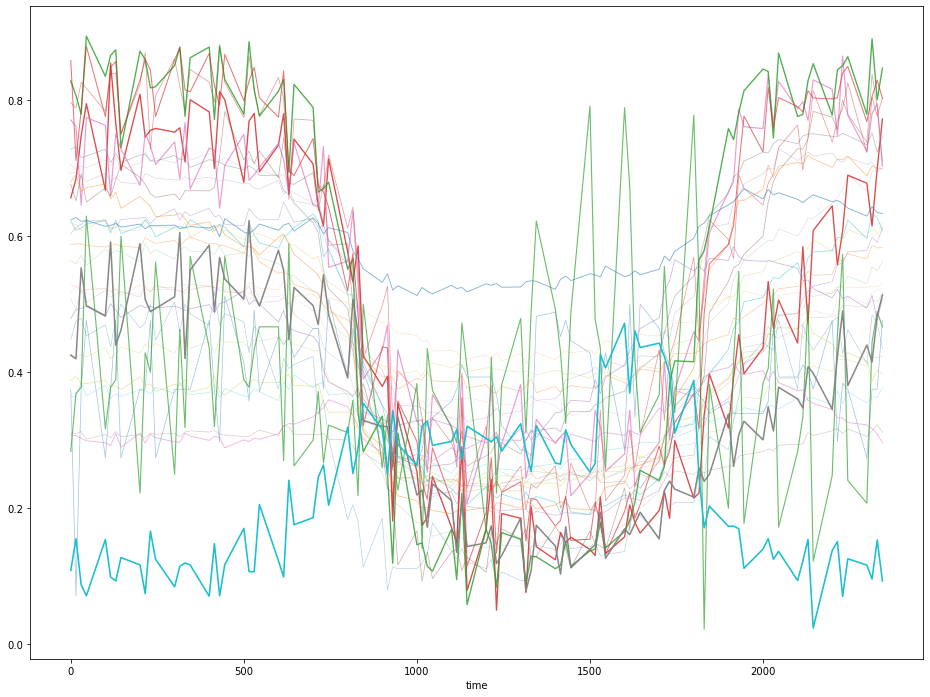

In [71]:
# o hell no..
cluster2 = qsub[(qsub[845] > qsub[1300]) & (qsub[1300] < qsub[1715])]
for _ in range(30): 
    row = cluster2.iloc[_][2:]
    row.plot(figsize = (16, 12), 
             alpha = cluster2.iloc[_]['tot_docks']/65,
             linewidth = cluster2.iloc[_]['tot_docks']/40)

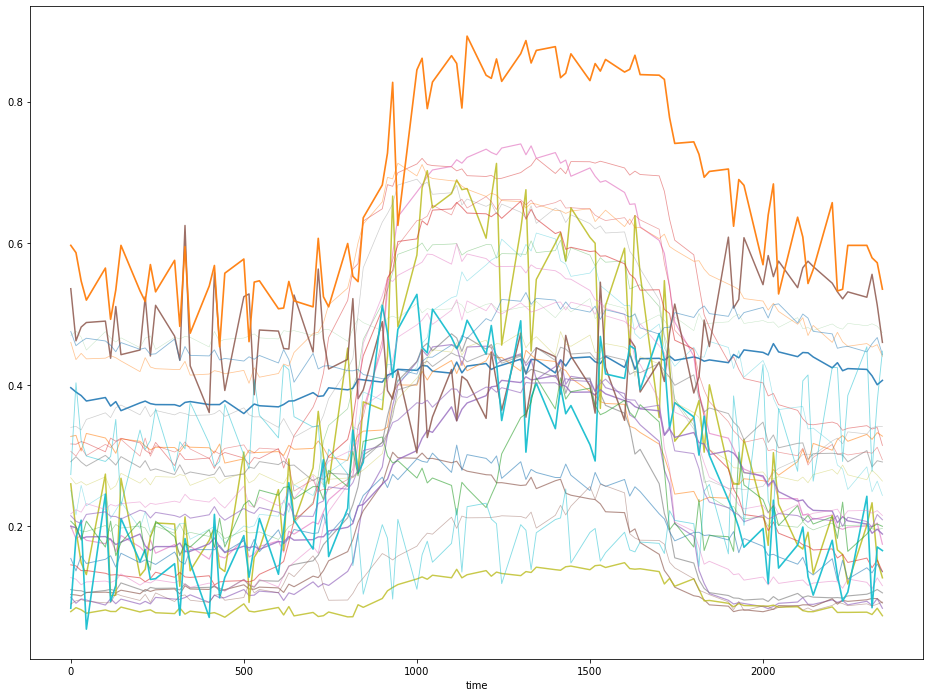

In [74]:
# yeah this aint it dawg
cluster2 = qsub[(qsub[845] < qsub[1300]) & (qsub[1300] > qsub[1715])]
for _ in range(30):   
    row = cluster2.iloc[_][2:]
    row.plot(figsize = (16, 12),
             alpha = cluster2.iloc[_]['tot_docks']/70,
             linewidth = cluster2.iloc[_]['tot_docks']/40)

In [75]:
# bring in the half hour
hh = pd.read_csv('halfhourly.csv')
hh

,dock_id,dock_name,time,avail_bikes,avail_docks,tot_docks,avail_bikes_proportion,avail_docks_proportion
0,72,W 52 St & 11 Ave,0,17.354839,37.645161,55,0.315543,0.684457
1,72,W 52 St & 11 Ave,30,15.971429,39.028571,55,0.290390,0.709610
2,72,W 52 St & 11 Ave,100,16.696970,38.303030,55,0.303581,0.696419
3,72,W 52 St & 11 Ave,130,16.948718,38.051282,55,0.308159,0.691841
4,72,W 52 St & 11 Ave,200,17.175000,37.825000,55,0.312273,0.687727
...,...,...,...,...,...,...,...,...
32544,3538,W 110 St & Amsterdam Ave,1230,12.000000,33.000000,45,0.266667,0.733333
32545,3629,Adam Clayton Powell Blvd & W 126 St,1100,17.000000,16.000000,33,0.515152,0.484848
32546,3629,Adam Clayton Powell Blvd & W 126 St,1200,17.000000,16.000000,33,0.515152,0.484848
32547,3629,Adam Clayton Powell Blvd & W 126 St,1230,20.000000,13.000000,33,0.606061,0.393939


In [76]:
piv = pd.pivot_table(hh, values = 'avail_bikes_proportion', index=['dock_id', 'tot_docks'], columns = 'time').reset_index()

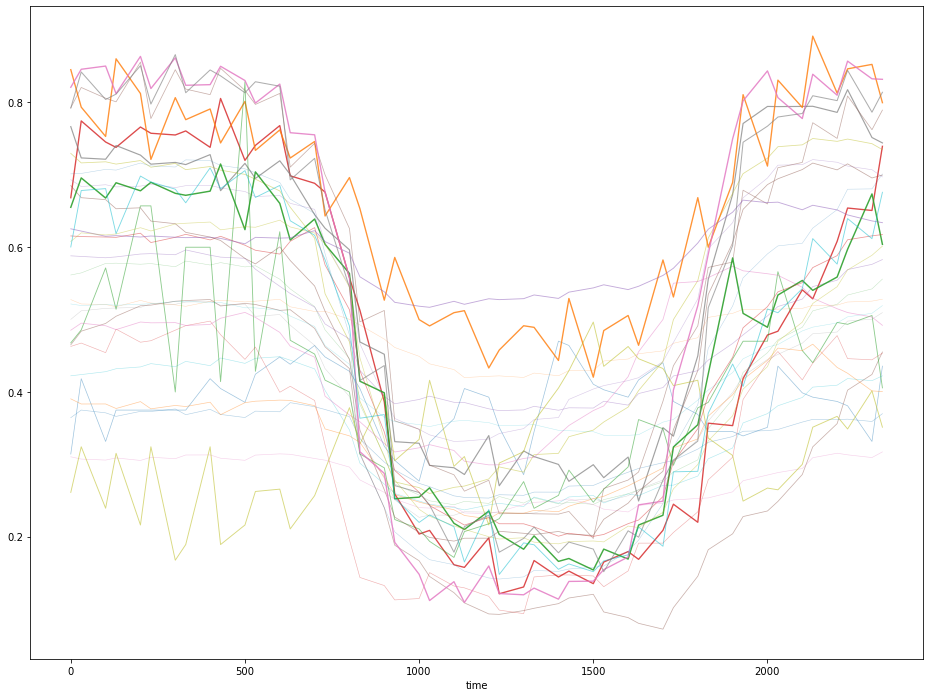

In [78]:
qsu = piv[~piv.isna().any(axis = 1)]
cluster2 = qsu[(qsu[830] > qsu[1300]) & (qsu[1300] < qsu[1730])]
for _ in range(30): 
    row = cluster2.iloc[_][2:]
    row.plot(figsize = (16, 12), 
             alpha = cluster2.iloc[_]['tot_docks']/65,
             linewidth = cluster2.iloc[_]['tot_docks']/40)

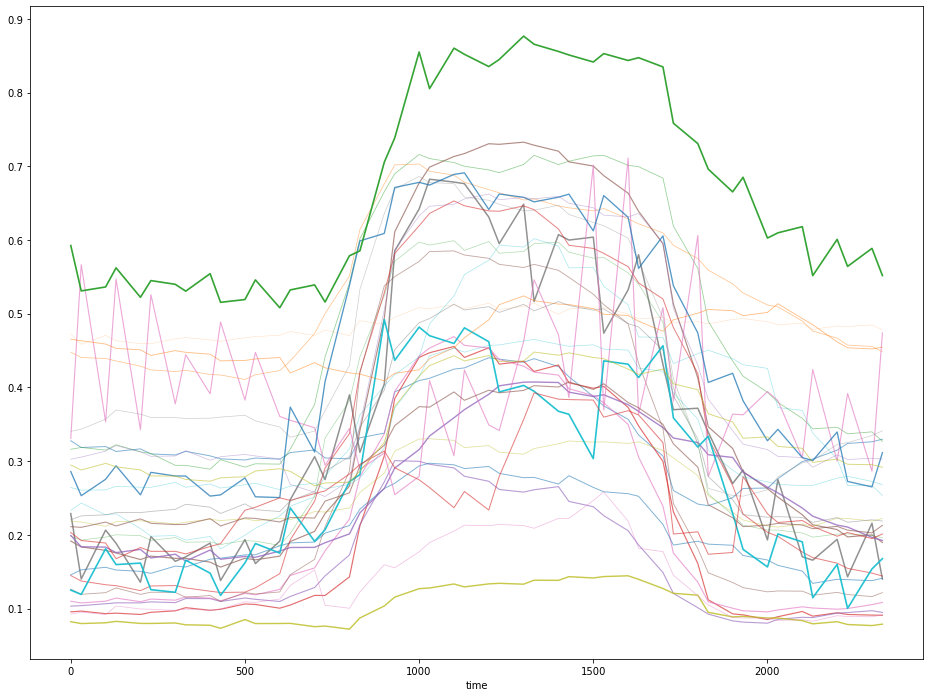

In [80]:
# forget it, either im querying from the SQL wrong or something else is just not right

cluster2 = qsu[(qsu[830] < qsu[1300]) & (qsu[1300] > qsu[1730])]
for _ in range(30): 
    row = cluster2.iloc[_][2:]
    row.plot(figsize = (16, 12), 
             alpha = cluster2.iloc[_]['tot_docks']/70,
             linewidth = cluster2.iloc[_]['tot_docks']/40)